<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [20]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,47,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,29,94,176,235,246,222,113,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53,92,157,224,254,254,254,254,254,254,254,0,0,0
8,0,0,0,0,0,0,0,0,0,59,154,154,154,185,253,254,254,254,208,169,101,26,4,4,78,0,0,0
9,0,0,0,0,0,0,0,0,59,249,254,254,253,230,230,230,164,45,8,0,0,0,0,0,0,0,0,0


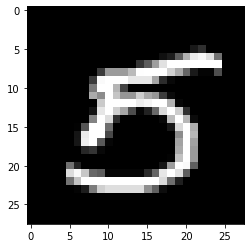

In [21]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 處裡圖片
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
# 一個神經元: binary crossentropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元: categorical crossentropy p1 log 1/q1 +.....
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [25]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 2s - loss: 0.3135 - accuracy: 0.9124 - val_loss: 0.1307 - val_accuracy: 0.9665
Epoch 2/50
540/540 - 2s - loss: 0.1302 - accuracy: 0.9624 - val_loss: 0.0929 - val_accuracy: 0.9748
Epoch 3/50
540/540 - 2s - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.0834 - val_accuracy: 0.9758
Epoch 4/50
540/540 - 2s - loss: 0.0637 - accuracy: 0.9816 - val_loss: 0.0780 - val_accuracy: 0.9782
Epoch 5/50
540/540 - 2s - loss: 0.0491 - accuracy: 0.9862 - val_loss: 0.0778 - val_accuracy: 0.9792
Epoch 6/50
540/540 - 2s - loss: 0.0378 - accuracy: 0.9894 - val_loss: 0.0757 - val_accuracy: 0.9777
Epoch 7/50
540/540 - 2s - loss: 0.0297 - accuracy: 0.9921 - val_loss: 0.0736 - val_accuracy: 0.9777
Epoch 8/50
540/540 - 2s - loss: 0.0236 - accuracy: 0.9936 - val_loss: 0.0696 - val_accuracy: 0.9807
Epoch 9/50
540/540 - 2s - loss: 0.0178 - accuracy: 0.9954 - val_loss: 0.0763 - val_accuracy: 0.9798
Epoch 10/50
540/540 - 2s - loss: 0.0151 - accuracy: 0.9964 - val_loss: 0.0800 - val_accuracy: 0.9777

In [26]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9780


[0.06896088272333145, 0.9779999852180481]